In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pedidos = pd.read_csv('/content/drive/MyDrive/Análise_Dados/olist_orders_dataset.csv')
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
pedidos.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
pedidos.columns = [
    'id_pedido',
    'id_cliente',
    'status_pedido',
    'data_compra',
    'data_aprovacao',
    'data_envio_transporte',
    'data_entrega',
    'data_estimada_entrega'
]
pedidos.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_envio_transporte,data_entrega,data_estimada_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Calcular o tempo real de entrega**
- Vamos criar uma nova coluna chamada tempo_entrega_real, que mostra quantos dias o pedido levou para chegar ao cliente, contando da data de compra até a data da entrega.

In [ ]:
pedidos['data_compra'] = pd.to_datetime(pedidos['data_compra'])
pedidos['data_entrega'] = pd.to_datetime(pedidos['data_entrega'])
pedidos['data_estimada_entrega'] = pd.to_datetime(pedidos['data_estimada_entrega'])

In [ ]:
# Remove temporariamente as linhas sem data de entrega
entregas = pedidos.dropna(subset=['data_entrega', 'data_estimada_entrega'])

# Calcula tempo de entrega e prazo estimado
entregas['tempo_entrega_real'] = (entregas['data_entrega'] - entregas['data_compra']).dt.days
entregas['prazo_estimado'] = (entregas['data_estimada_entrega'] - entregas['data_compra']).dt.days


<ipython-input-17-95b4042f482a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas['tempo_entrega_real'] = (entregas['data_entrega'] - entregas['data_compra']).dt.days
<ipython-input-17-95b4042f482a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas['prazo_estimado'] = (entregas['data_estimada_entrega'] - entregas['data_compra']).dt.days


# Ver se os pedidos foram entregues dentro do prazo ou com atraso
# Vamos criar uma nova coluna chamada atrasado, que indica:

True → pedido foi entregue depois do prazo estimado

False → pedido chegou no prazo ou antes

In [ ]:
entregas['atrasado'] = entregas['tempo_entrega_real'] > entregas['prazo_estimado']
entregas['atrasado'].value_counts()

<ipython-input-18-4fd910489cd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas['atrasado'] = entregas['tempo_entrega_real'] > entregas['prazo_estimado']


,count
atrasado,
False,89168
True,7308


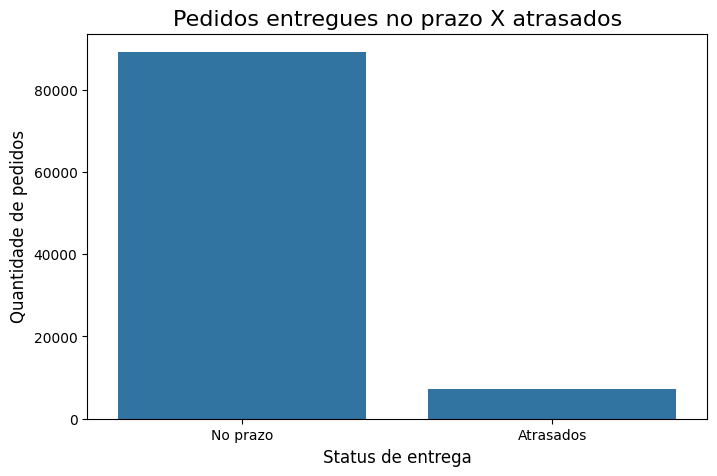

In [ ]:
# Gráfico de barras do status de atraso
figure = plt.figure(figsize = (8,5))
sns.countplot(data = entregas, x = 'atrasado')
plt.title('Pedidos entregues no prazo X atrasados', fontsize = 16)
plt.xlabel('Status de entrega', fontsize = 12)
plt.ylabel('Quantidade de pedidos', fontsize = 12)
# Mudando o Rótulo do nome das barras
# xticks([0, 1], ['No prazo', 'Atrasado']): muda os nomes do eixo X, onde: 0 representa False e 1 representa True
plt.xticks([0,1], ['No prazo', 'Atrasados'])
plt.show()

In [ ]:
# Calcula a média dos prazos
media_real = entregas['tempo_entrega_real'].mean()
media_estimado = entregas['prazo_estimado'].mean()

print(f'Tempo médio de entrega real: {media_real:.1f} dias')
print(f'Prazo médio estimado: {media_estimado:.1f} dias')

Tempo médio de entrega real: 12.1 dias
Prazo médio estimado: 23.4 dias


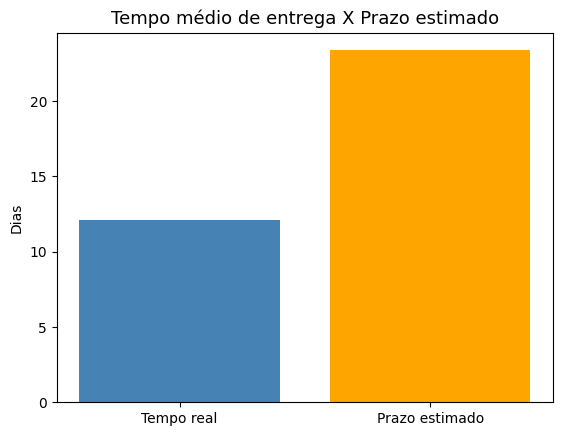

In [ ]:
# Dados para o gráfico
labels = ['Tempo real', 'Prazo estimado']
valores = [media_real, media_estimado]

plt.bar(labels, valores, color = ['steelblue', 'orange'])
plt.title('Tempo médio de entrega X Prazo estimado', fontsize = 13)
plt.ylabel('Dias', fontsize = 10)
plt.show()

In [ ]:
pedidos['status_pedido'].value_counts()

,count
status_pedido,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [ ]:
pedidos['status_pedido'] = pedidos['status_pedido'].replace({ # O .replace() faz substituições linha por linha
    'delivered': 'Entregue',
    'shipped': 'Enviado',
    'invoiced': 'Faturado',
    'processing': 'Processando',
    'created': 'Criado',
    'approved': 'Aprovado',
    'canceled': 'Cancelado',
    'unavailable': 'Indisponível'
})
pedidos['status_pedido'].value_counts()

,count
status_pedido,
Entregue,96478
Enviado,1107
Cancelado,625
Indisponível,609
Faturado,314
Processando,301
Criado,5
Aprovado,2


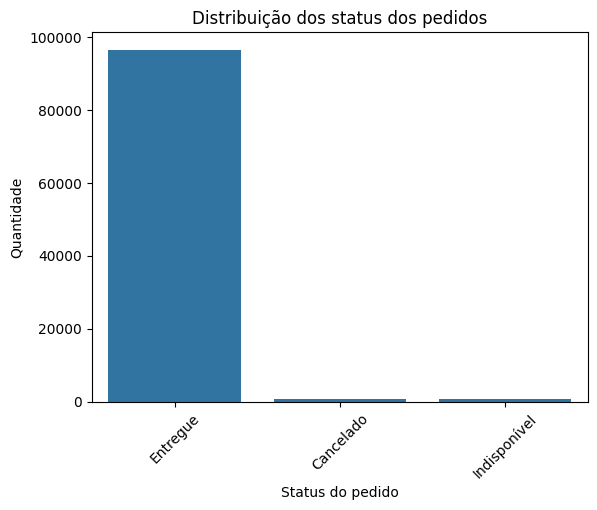

In [ ]:
status_desejados = ['Entregue', 'Cancelado', 'Indisponível']
sns.countplot(data = pedidos[pedidos['status_pedido'].isin(status_desejados)], x = 'status_pedido', order = status_desejados)
plt.title('Distribuição final dos pedidos')
plt.xlabel('Status do pedido')
plt.ylabel('Quantidade')
plt.xticks(rotation = 45)
plt.show()

# Em que dia da semana os clientes mais compram?

In [ ]:
pedidos['dia_semana'] = pedidos['data_compra'].dt.day_name()
pedidos['dia_semana'].value_counts()

,count
dia_semana,
Monday,16196
Tuesday,15963
Wednesday,15552
Thursday,14761
Friday,14122
Sunday,11960
Saturday,10887


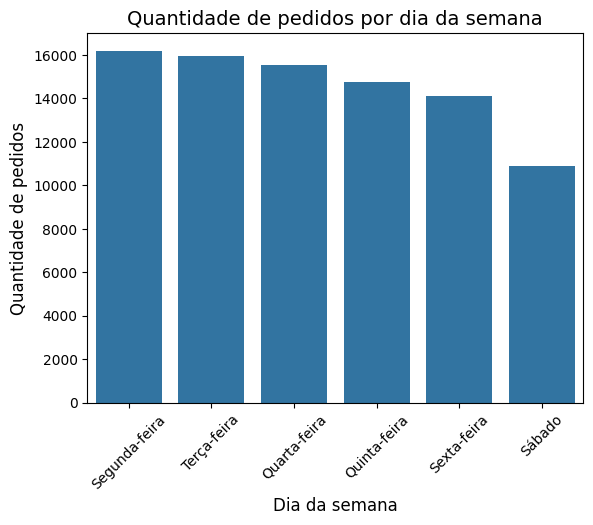

In [ ]:
pedidos['dia_semana'] = pedidos['dia_semana'].replace({
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
})

ordem_dias = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']
sns.countplot(data = pedidos, x = 'dia_semana', order = ordem_dias)

plt.title('Quantidade de pedidos por dia da semana', fontsize = 14)
plt.xlabel('Dia da semana', fontsize = 12)
plt.ylabel('Quantidade de pedidos', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
itens = pd.read_csv('/content/drive/MyDrive/Análise_Dados/olist_order_items_dataset.csv')
produtos = pd.read_csv('/content/drive/MyDrive/Análise_Dados/olist_products_dataset.csv')

itens

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
itens.columns = [
    'id_pedido',
    'sequencia_item',
    'id_produto',
    'id_vendedor',
    'data_envio',
    'preco',
    'frete'
]

produtos.columns = [
    'id_produto',
    'categoria',
    'nome_categoria_ingles',
    'comprimento_cm',
    'altura_cm',
    'largura_cm',
    'peso_gramas',
    'tempo_envio_dias',
    'tempo_envio_dias_completo'
]



In [ ]:
# Vamos juntar os dois DataFrame usando a coluna product_id que existe em ambos
itens_produtos = itens.merge(produtos, on = 'id_produto')
itens_produtos

,id_pedido,sequencia_item,id_produto,id_vendedor,data_envio,preco,frete,categoria,nome_categoria_ingles,comprimento_cm,altura_cm,largura_cm,peso_gramas,tempo_envio_dias,tempo_envio_dias_completo
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
mais_vendidos = itens_produtos['categoria'].value_counts().head()
mais_vendidos

,count
categoria,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827


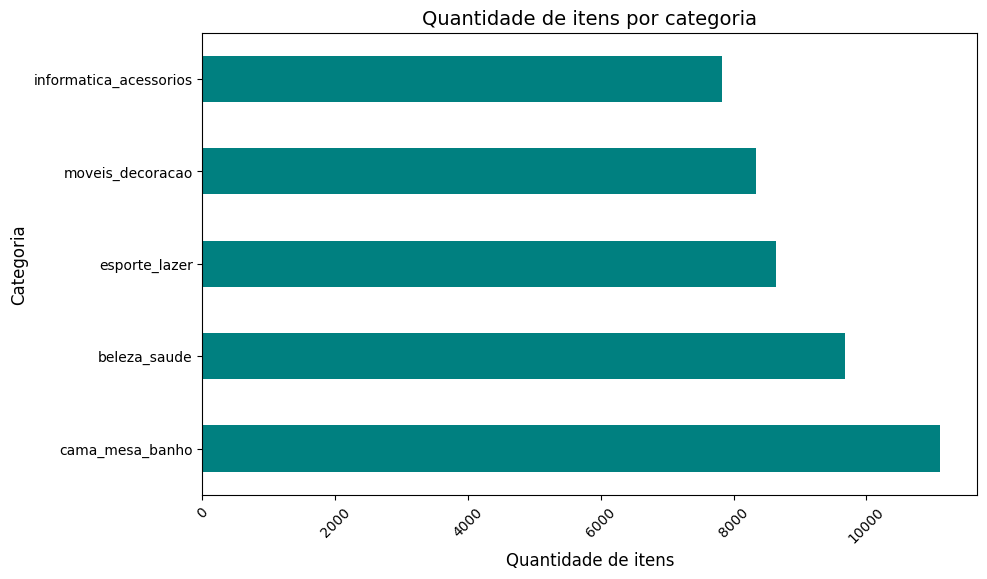

In [ ]:
plt.figure(figsize =(10,6))
mais_vendidos.plot(kind = 'barh', color = 'teal')

plt.title('Quantidade de itens por categoria', fontsize = 14)
plt.xlabel('Quantidade de itens', fontsize = 12)
plt.ylabel('Categoria', fontsize = 12)

plt.xticks(rotation = 45)
plt.show()